In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
409,7989-CHGTL,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.60,19.6,Yes
3279,6064-PUPMC,Male,0,Yes,Yes,23,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),57.20,1423.35,No
1346,2845-HSJCY,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,87.25,1258.6,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
6618,8404-FYDIB,Male,0,No,No,26,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),86.65,2208.75,No


In [15]:
df.drop("customerID", axis = "columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ronil\AppData\Local\Temp\ipykernel_12708\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [19]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [20]:

df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

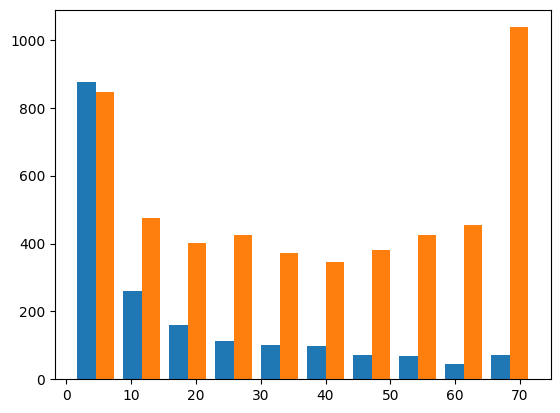

In [21]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no])

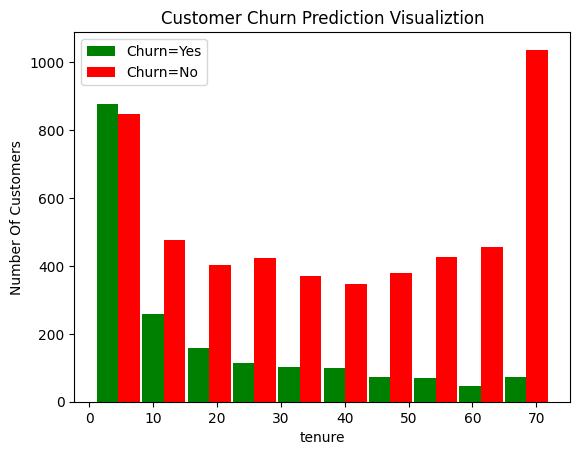

In [22]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
# blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

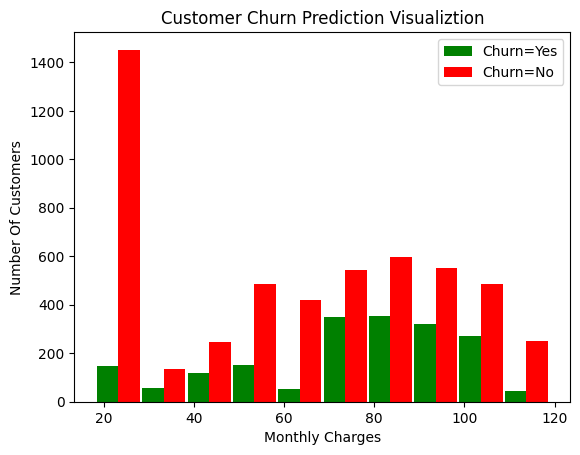

In [23]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [24]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
                
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [25]:
df1.replace("No internet service", "No", inplace = True)
df1.replace("No phone service", "No", inplace = True)

C:\Users\ronil\AppData\Local\Temp\ipykernel_12708\3144881796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace = True)
C:\Users\ronil\AppData\Local\Temp\ipykernel_12708\3144881796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace = True)


In [26]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [27]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\ronil\AppData\Local\Temp\ipykernel_12708\4027547381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [28]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [29]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\ronil\AppData\Local\Temp\ipykernel_12708\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [30]:

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'], dtype = int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [32]:

df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4024,1,0,0,0,7,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3039,0,1,1,0,72,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
5506,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5402,1,0,1,1,9,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
168,0,1,1,0,58,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


In [33]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
148,0,0,0,1,0.408451,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
2748,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
404,0,0,0,0,0.267606,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [35]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
X_train.shape

(5625, 26)

In [37]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100


176/176 [==============================] - 1s 983us/step - loss: 0.5325 - accuracy: 0.7230
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8004
Epoch 3/100
176/176 [==============================] - 0s 875us/step - loss: 0.4169 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 961us/step - loss: 0.4142 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 897us/step - loss: 0.4125 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 902us/step - loss: 0.4090 - accuracy: 0.8089
Epoch 7/100
176/176 [==============================] - 0s 903us/step - loss: 0.4078 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 903us/step - loss: 0.4068 - accuracy: 0.8082
Epoch 9/100
176/176 [==============================] - 0s 989us/step - loss: 0.4054 - accuracy: 0.8105
Epoch 10/100
176/176 [==============================] - 0s 869us/step - 

In [38]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 791us/step - loss: 0.4857 - accuracy: 0.7676


[0.48572635650634766, 0.7675906419754028]

In [39]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 744us/step


array([[0.05524949],
       [0.6474886 ],
       [0.0073595 ],
       [0.6135479 ],
       [0.50696653]], dtype=float32)

In [40]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [42]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       999
           1       0.61      0.56      0.58       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

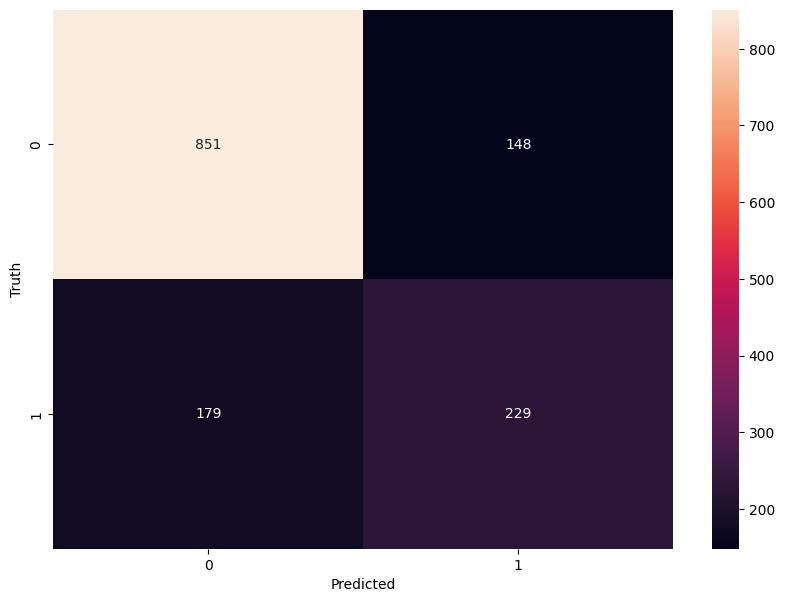

In [44]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 823us/step - loss: 0.4903 - accuracy: 0.7630
Epoch 2/100
176/176 [==============================] - 0s 812us/step - loss: 0.4224 - accuracy: 0.7977
Epoch 3/100
176/176 [==============================] - 0s 897us/step - loss: 0.4170 - accuracy: 0.8062
Epoch 4/100
176/176 [==============================] - 0s 852us/step - loss: 0.4132 - accuracy: 0.8057
Epoch 5/100
176/176 [==============================] - 0s 886us/step - loss: 0.4114 - accuracy: 0.8060
Epoch 6/100
176/176 [==============================] - 0s 823us/step - loss: 0.4092 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 834us/step - loss: 0.4086 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 812us/step - loss: 0.4077 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 0s 817us/step - loss: 0.4059 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 817us/step - l

In [47]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
df_class_0.shape


(5163, 27)

In [50]:
df_class_1.shape

(1869, 27)

In [54]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

In [55]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [56]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 1s 935us/step - loss: 0.6146 - accuracy: 0.6702
Epoch 2/100
94/94 [==============================] - 0s 902us/step - loss: 0.5162 - accuracy: 0.7455
Epoch 3/100
94/94 [==============================] - 0s 903us/step - loss: 0.4943 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 0s 892us/step - loss: 0.4873 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 0s 870us/step - loss: 0.4845 - accuracy: 0.7562
Epoch 6/100
94/94 [==============================] - 0s 903us/step - loss: 0.4800 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 0s 957us/step - loss: 0.4784 - accuracy: 0.7615
Epoch 8/100
94/94 [==============================] - 0s 903us/step - loss: 0.4750 - accuracy: 0.7635
Epoch 9/100
94/94 [==============================] - 0s 903us/step - loss: 0.4731 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 936us/step - loss: 0.4715 - accura

In [58]:
count_class_0, count_class_1

(5163, 1869)

In [65]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

In [66]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

In [67]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [68]:
y_preds1 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 1s 985us/step - loss: 0.5936 - accuracy: 0.6863
Epoch 2/100
259/259 [==============================] - 0s 837us/step - loss: 0.4962 - accuracy: 0.7598
Epoch 3/100
259/259 [==============================] - 0s 868us/step - loss: 0.4865 - accuracy: 0.7620
Epoch 4/100
259/259 [==============================] - 0s 899us/step - loss: 0.4806 - accuracy: 0.7674
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7705
Epoch 6/100
259/259 [==============================] - 0s 826us/step - loss: 0.4732 - accuracy: 0.7715
Epoch 7/100
259/259 [==============================] - 0s 841us/step - loss: 0.4696 - accuracy: 0.7769
Epoch 8/100
259/259 [==============================] - 0s 841us/step - loss: 0.4669 - accuracy: 0.7764
Epoch 9/100
259/259 [==============================] - 0s 826us/step - loss: 0.4630 - accuracy: 0.7804
Epoch 10/100
259/259 [==============================] - 0s 915us/step - los

In [71]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [73]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 857us/step - loss: 0.5508 - accuracy: 0.7119
Epoch 2/100
259/259 [==============================] - 0s 865us/step - loss: 0.4705 - accuracy: 0.7754
Epoch 3/100
259/259 [==============================] - 0s 981us/step - loss: 0.4618 - accuracy: 0.7808
Epoch 4/100
259/259 [==============================] - 0s 892us/step - loss: 0.4565 - accuracy: 0.7837
Epoch 5/100
259/259 [==============================] - 0s 861us/step - loss: 0.4527 - accuracy: 0.7870
Epoch 6/100
259/259 [==============================] - 0s 954us/step - loss: 0.4478 - accuracy: 0.7896
Epoch 7/100
259/259 [==============================] - 0s 853us/step - loss: 0.4457 - accuracy: 0.7901
Epoch 8/100
259/259 [==============================] - 0s 837us/step - loss: 0.4419 - accuracy: 0.7908
Epoch 9/100
259/259 [==============================] - 0s 837us/step - loss: 0.4402 - accuracy: 0.7932
Epoch 10/100
259/259 [==============================] - 0s 872us/step - l

In [74]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [75]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [84]:
df3 = X_train.copy()
df3['Churn'] = y_train
df3.head()
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

df_class_0.shape


(5163, 27)

In [86]:
# def get_train_batch(splits):
#     df_train_list = []
#     j = 0
#     for i in range(splits):
#         n = (1495 + j)
#         df_train = pd.concat([df3_class0[j:n], df3_class1], axis = 0)
#         df_train_list.append(df_train)
#         j += np.round(4130 / 1495)
    
#     return df_train_list

def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [87]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 871us/step - loss: 0.6411 - accuracy: 0.6395
Epoch 2/100
94/94 [==============================] - 0s 839us/step - loss: 0.5273 - accuracy: 0.7492
Epoch 3/100
94/94 [==============================] - 0s 860us/step - loss: 0.5029 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 850us/step - loss: 0.4946 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 937us/step - loss: 0.4887 - accuracy: 0.7686
Epoch 6/100
94/94 [==============================] - 0s 979us/step - loss: 0.4860 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 989us/step - loss: 0.4818 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 882us/step - loss: 0.4806 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 914us/step - loss: 0.4785 - accuracy: 0.7672
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy

In [90]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 925us/step - loss: 0.6082 - accuracy: 0.6783
Epoch 2/100
94/94 [==============================] - 0s 828us/step - loss: 0.5048 - accuracy: 0.7475
Epoch 3/100
94/94 [==============================] - 0s 871us/step - loss: 0.4928 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 850us/step - loss: 0.4875 - accuracy: 0.7569
Epoch 5/100
94/94 [==============================] - 0s 925us/step - loss: 0.4817 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 0s 946us/step - loss: 0.4775 - accuracy: 0.7645
Epoch 8/100
94/94 [==============================] - 0s 882us/step - loss: 0.4754 - accuracy: 0.7649
Epoch 9/100
94/94 [==============================] - 0s 828us/step - loss: 0.4733 - accuracy: 0.7649
Epoch 10/100
94/94 [==============================] - 0s 882us/step - loss: 0.4715 - accuracy

In [91]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 890us/step - loss: 0.6218 - accuracy: 0.6706
Epoch 2/100
83/83 [==============================] - 0s 890us/step - loss: 0.5121 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7700
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7723
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7787
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7746
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7769
Epoch 8/100
83/83 [==============================] - 0s 939us/step - loss: 0.4719 - accuracy: 0.7886
Epoch 9/100
83/83 [==============================] - 0s 890us/step - loss: 0.4691 - accuracy: 0.7825
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7806
E

In [98]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [99]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.72      1407

